[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


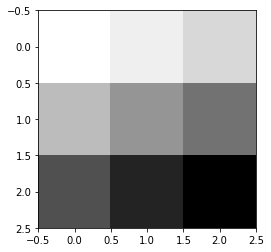

In [4]:
# cnn_basic.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
#
# a = tf.constant(10)
# b = tf.constant(20)
# add_node = tf.add(a,b)
#
# print(add_node.eval())
# print(sess.run(add_node))

image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image)
print(image.shape)  # (1,3,3,1)
plt.imshow(image.reshape(3,3),cmap='Greys')
print(image.reshape(3,3))
plt.show()

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


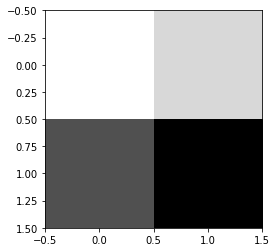

In [3]:
# CNN(Convolutional Neural Network)
# conv2d layer   , filter (2,2,1,1)
#  출력 이미지 = (N - F)/stride  + 1

# image (1,3,3,1)
# 1 : 이미지의 갯수
# 3 : 가로 픽셀수
# 3 : 세로 픽셀 수
# 1 : color, Greyscale = 1

# filter (2,2,1,1)
# 2 : 가로 갯수
# 2 : 세로 갯수
# 1 : color
# 1 : filter의 갯수
#
# 출력 이미지 = (3 - 2)/1 + 1 = 2, zero padding을 안했을 때
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
conv2d_img = conv2d.eval()
print(conv2d_img)  # (1,2,2,1)
plt.imshow(conv2d_img.reshape(2,2),cmap='Greys')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


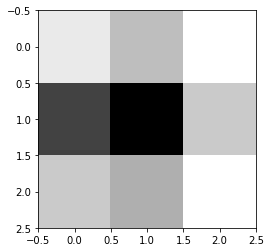

In [5]:
# 출력 이미지 = (3+1 - 2)/1 + 1 = 3, zero padding을 했을 때(padding='SAME')
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img)  # (1,3,3,1)
plt.imshow(conv2d_img.reshape(3,3),cmap='Greys')
plt.show()

[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]


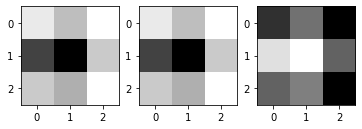

In [11]:
# conv2d : 3 filters, padding = 'SAME' (zero padding 함)
# image : (1,3,3,1), Filter: (2,2,1,3), stride : (1,1)
# 3장의 필터를 사용하여 출력도 3장 출력
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_img = conv2d.eval()
# print(conv2d_img)  # (1,3,3,3)
conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img)  # (3,3,3,1)

# 시각화
for i, one_imge in enumerate(conv2d_img):
    plt.subplot(1,3,i+1)
    plt.imshow(one_imge.reshape(3,3),cmap='Greys')
plt.show()

In [ ]:
# max pooling : ()